# Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# *Import* Data Arrhythmia

In [ ]:
#Melakukan pembacaan data
!gdown --id 1_9pQnq9dk2u7txcAweCTsajUmOUl8QcU
data = pd.read_csv("arrhythmia.data", header=None)
data

# *Data* Preprocessing

In [ ]:
#Informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [ ]:
#Melakukan deskripsi numerik pada dataset
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:
#Menghitung nilai yang kosong "?" pada dataset
count=0
for i in range(0,450):
    for j in range(0,280):
        if (data.iloc[i,j]=='?'):
            count =count+1
print(count)
data = data.replace('?', np.NaN)

407


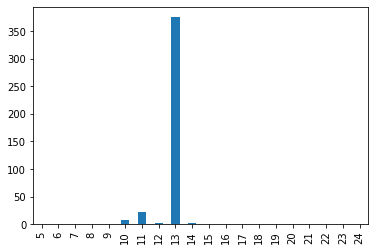

In [ ]:
#Menampilkan data kosong dalam bentuk diagram
pd.isnull(data).sum()[5:25].plot(kind='bar')

In [ ]:
#Melakukan drop data pada kolom 13
data.drop(columns = 13, inplace=True)

In [ ]:
#Melakukan copy data
dataCopy = data.copy()

In [ ]:
#Fungsi ini memasukan nilai yang null dengan inputer
inputer = KNNImputer()
dataCopy = pd.DataFrame(inputer.fit_transform(dataCopy), columns = dataCopy.columns)

In [ ]:
#Mengecek kembali apakah ada nilai yang kosong
count=0
for i in range(0,450):
    for j in range(0,279):
        if (dataCopy.iloc[i,j]=='?'):
            count =count+1
print(count)

0


In [ ]:
#Melakukan drop data yang bertipe object 
dropped = dataCopy.select_dtypes('object').columns.to_list()
dropped
dataCopy = dataCopy.drop(dropped, axis=1)
dataCopy

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1.0
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10.0
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2.0
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1.0


In [ ]:
#Pengecekan dataset apakah terdapat nilai yang null
data.isnull().values.any()

False

In [ ]:
#Melakukan normalisasi dengan metode min-max
scaler = MinMaxScaler()
dataCopy.iloc[:,:-1]=scaler.fit_transform(dataCopy.iloc[:,:-1].to_numpy())
dataCopy

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,1.000000,0.381356,0.968531,0.0,0.0,0.53125,0.741667,0.507519,0.569579,8.0
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,1.000000,0.360169,1.000000,0.0,0.0,0.31250,0.675000,0.485714,0.500971,6.0
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,1.000000,0.402542,0.916084,0.0,0.0,0.34375,0.783333,0.424812,0.566990,10.0
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,1.000000,0.516949,0.923077,0.0,0.0,0.37500,0.716667,0.592481,0.648544,1.0
4,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,...,1.000000,0.555085,0.874126,0.0,0.0,0.21875,0.825000,0.523308,0.656311,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732,0.395894,...,1.000000,0.182203,0.825175,0.0,0.0,0.46875,0.550000,0.299248,0.246602,1.0
448,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.340659,0.356098,0.756598,...,1.000000,0.661017,0.944056,0.0,0.0,0.37500,0.700000,0.618045,0.653722,10.0
449,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,0.255132,...,1.000000,0.690678,0.000000,0.0,0.0,0.71875,0.583333,0.000000,0.034951,2.0
450,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,0.662757,...,0.902439,0.508475,0.975524,0.0,0.0,0.40625,0.700000,0.520301,0.551456,1.0


In [ ]:
#@title Menambah Nama
#Menamakan pada header
final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]
dataCopy.columns=final_df_columns
dataCopy.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,1.0,0.381356,0.968531,0.0,0.0,0.53125,0.741667,0.507519,0.569579,8.0
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,1.0,0.360169,1.000000,0.0,0.0,0.31250,0.675000,0.485714,0.500971,6.0
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,1.0,0.402542,0.916084,0.0,0.0,0.34375,0.783333,0.424812,0.566990,10.0
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,1.0,0.516949,0.923077,0.0,0.0,0.37500,0.716667,0.592481,0.648544,1.0
4,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,...,1.0,0.555085,0.874126,0.0,0.0,0.21875,0.825000,0.523308,0.656311,7.0


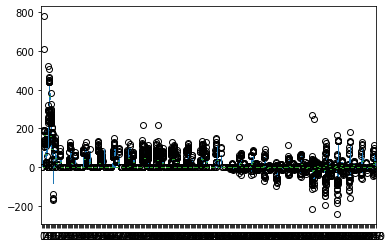

In [ ]:
#Ilustrasi plotting data sebelum normalisasi
data.plot.box()

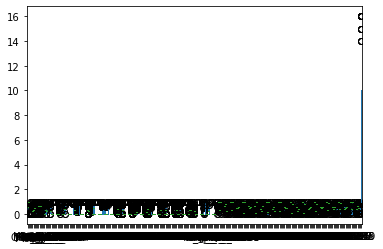

In [ ]:
#Ilustrasi plotting data setelah normalisasi
dataCopy.plot.box()

In [ ]:
dataCopy.corr()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
Age,1.000000,-0.059042,-0.109458,0.381555,-0.004032,0.041149,0.195691,0.025654,0.099755,-0.265868,...,0.164816,-0.158009,0.082376,0.090413,NaN,-0.037877,-0.271504,0.018043,-0.199728,-0.092381
Sex,-0.059042,1.000000,-0.124685,-0.248104,-0.337101,-0.046771,0.072052,-0.184736,-0.081051,0.069434,...,0.230938,-0.042638,0.092879,0.027401,NaN,0.014210,0.065684,0.031688,0.046605,-0.178080
Height,-0.109458,-0.124685,1.000000,-0.074957,-0.006329,0.013601,-0.237314,-0.038411,0.029025,0.061539,...,-0.018876,-0.073439,-0.091361,-0.002545,NaN,0.067670,-0.008471,-0.090370,-0.092235,0.006648
Weight,0.381555,-0.248104,-0.074957,1.000000,0.100094,0.119826,0.118657,0.149987,0.120668,-0.173355,...,0.050471,-0.026926,0.051946,0.047448,NaN,-0.046278,-0.144721,0.062285,-0.050682,-0.090151
QRS_Dur,-0.004032,-0.337101,-0.006329,0.100094,1.000000,0.021831,0.218681,0.397435,0.049682,-0.146043,...,-0.198941,0.091384,-0.228688,-0.013697,NaN,-0.065596,-0.222170,0.129796,-0.082791,0.323879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V6276,-0.037877,0.014210,0.067670,-0.046278,-0.065596,0.143272,-0.034971,0.049175,0.248092,0.082009,...,-0.085446,-0.008013,-0.092069,-0.019946,NaN,1.000000,-0.043307,-0.069852,-0.064171,-0.086427
V6277,-0.271504,0.065684,-0.008471,-0.144721,-0.222170,0.061160,-0.038884,-0.184846,0.016054,0.063300,...,0.116959,0.093749,-0.072408,-0.017690,NaN,-0.043307,1.000000,-0.124004,0.687877,-0.030798
V6278,0.018043,0.031688,-0.090370,0.062285,0.129796,-0.027691,0.256200,0.130202,-0.016365,0.297780,...,0.002630,0.671383,0.562825,-0.051131,NaN,-0.069852,-0.124004,1.000000,0.611219,0.003476
V6279,-0.199728,0.046605,-0.092235,-0.050682,-0.082791,0.021048,0.150979,-0.014430,0.004283,0.255203,...,0.082538,0.560374,0.341484,-0.049667,NaN,-0.064171,0.687877,0.611219,1.000000,-0.009275


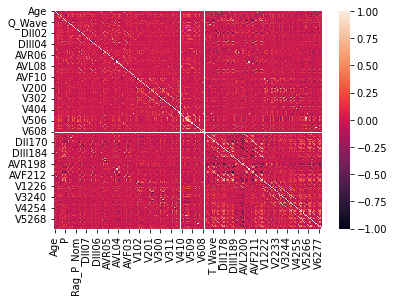

In [ ]:
sns.heatmap(dataCopy.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f59ba94bfd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


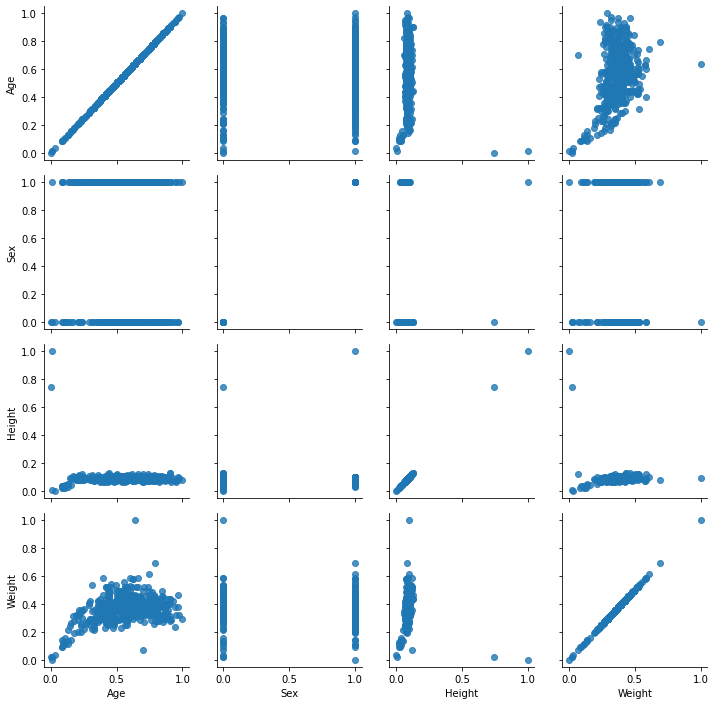

In [ ]:
g = sns.PairGrid(dataCopy, vars=['Age', 'Sex', 'Height', 'Weight'], palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f59b85a9890> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


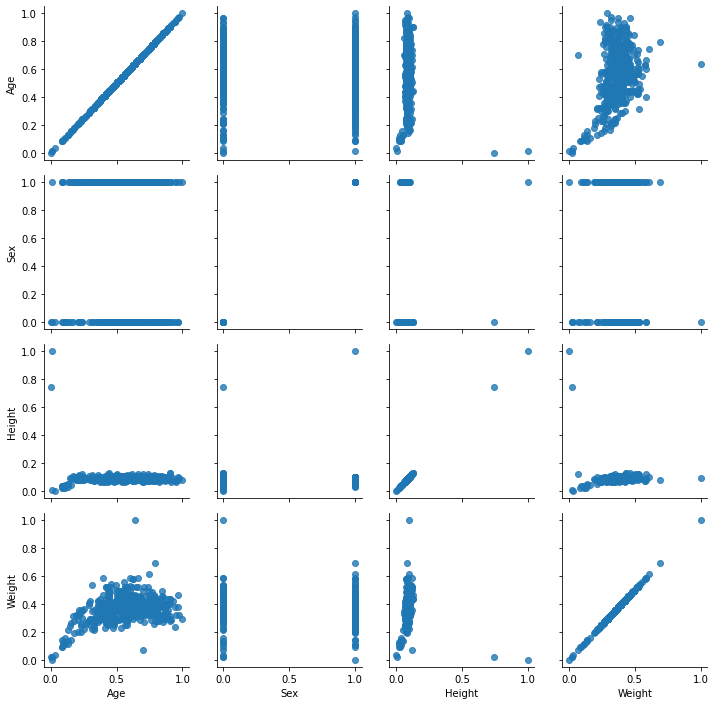

In [ ]:
g = sns.PairGrid(dataCopy, vars=['Age', 'Sex', 'Height', 'Weight'], palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

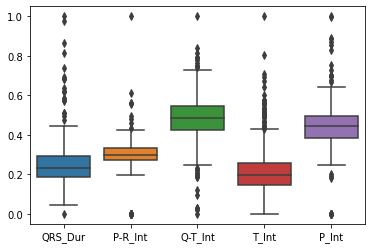

In [ ]:
#Box plot
sns.boxplot(data=dataCopy[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


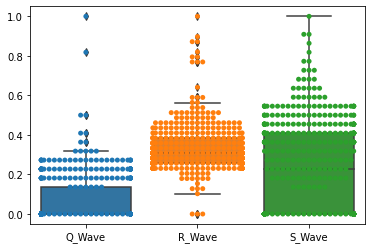

In [ ]:
#Boxplot
sns.boxplot(data=dataCopy[["Q_Wave","R_Wave","S_Wave"]])
sns.swarmplot(data=dataCopy[["Q_Wave","R_Wave","S_Wave"]]);

In [ ]:
#Perintah untuk pembagian data antara data training dan data testing
x = dataCopy.drop("class", axis=1)
y = dataCopy["class"]

#Pada proses pembagiaanya, data tes digunakan sebanyak 20% dan data training sebanyak 80% dari keseluruhan data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Multi Layer Perceptron

In [ ]:
#Inisiasi algoritma MLP atau membuat objek
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

In [ ]:
#Proses fitting antara data training pada model
clf.fit(x_train,y_train)

Iteration 1, loss = 2.71916452
Iteration 2, loss = 2.43425409
Iteration 3, loss = 2.25219482
Iteration 4, loss = 2.09227771
Iteration 5, loss = 1.97883354
Iteration 6, loss = 1.84686932
Iteration 7, loss = 1.74139599
Iteration 8, loss = 1.66354784
Iteration 9, loss = 1.59884473
Iteration 10, loss = 1.55515992
Iteration 11, loss = 1.52816236
Iteration 12, loss = 1.50429575
Iteration 13, loss = 1.48576949
Iteration 14, loss = 1.47163288
Iteration 15, loss = 1.45562677
Iteration 16, loss = 1.44199631
Iteration 17, loss = 1.42445281
Iteration 18, loss = 1.40501879
Iteration 19, loss = 1.39031238
Iteration 20, loss = 1.37453952
Iteration 21, loss = 1.36190344
Iteration 22, loss = 1.34954931
Iteration 23, loss = 1.33082678
Iteration 24, loss = 1.32062463
Iteration 25, loss = 1.30600181
Iteration 26, loss = 1.29222581
Iteration 27, loss = 1.27482528
Iteration 28, loss = 1.26233459
Iteration 29, loss = 1.24821309
Iteration 30, loss = 1.23567902
Iteration 31, loss = 1.22380520
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [ ]:
#Melakukan kalkulasi prediksi menggunakan library
ypred=clf.predict(x_test)

print("Akurasi Prediksi Data: ", accuracy_score(y_test,ypred)*100,"%")

Akurasi Prediksi Data:  57.14285714285714 %
